In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
results=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\international football\results.csv")
shootouts=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\international football\shootouts.csv")

In [3]:
df=results.merge(shootouts,how="left",on=["date","home_team","away_team"])

In [4]:
df.rename(columns={"winner":"penalty_winner"},inplace=True)

In [5]:
df["date"]=pd.to_datetime(df["date"])

In [6]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN
...,...,...,...,...,...,...,...,...,...,...
43446,2022-05-28,India,Jordan,0,2,Friendly,Doha,Qatar,True,NaN
43447,2022-05-28,Mexico,Nigeria,2,1,Friendly,Arlington,United States,True,NaN
43448,2022-05-29,United Arab Emirates,Gambia,1,1,Friendly,Dubai,United Arab Emirates,False,NaN
43449,2022-05-30,Ethiopia,Lesotho,1,1,Friendly,Adama,Ethiopia,False,NaN


# Plot quantity of matches per year since 1872

In [7]:
df["year"]=df.date.dt.year

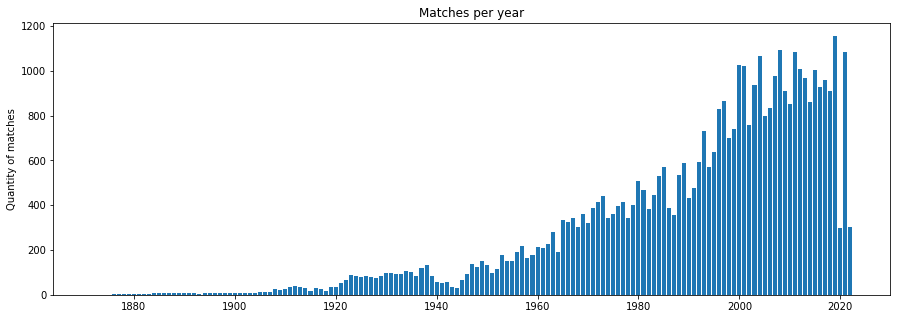

In [8]:
grouped=df.groupby("year")["date"].count().reset_index().sort_values("year")

plt.figure(figsize=(15,5))
plt.bar(grouped.year,grouped.date)
plt.title("Matches per year")
plt.ylabel("Quantity of matches")
plt.show()

# Find 50 team that have played the most internation matches since 1872

In [9]:
home=df.groupby("home_team")["home_team"].count().reset_index(name="home_matches")
away=df.groupby("away_team")["away_team"].count().reset_index(name="away_matches")
merged=home.merge(away,left_on="home_team",right_on="away_team")[["home_team","home_matches","away_matches"]]
merged["matches"]=merged["home_matches"]+merged["away_matches"]
result=merged.rename(columns={"home_team":"team"})[["team","matches"]].sort_values("matches",ascending=False)
result

,team,matches
249,Sweden,1045
79,England,1038
35,Brazil,1011
12,Argentina,1007
98,Germany,976
...,...,...
218,Saint Helena,4
211,Romani people,3
200,Parishes of Jersey,3
158,Manchukuo,3


# find teams that have played the most matches on World Cup

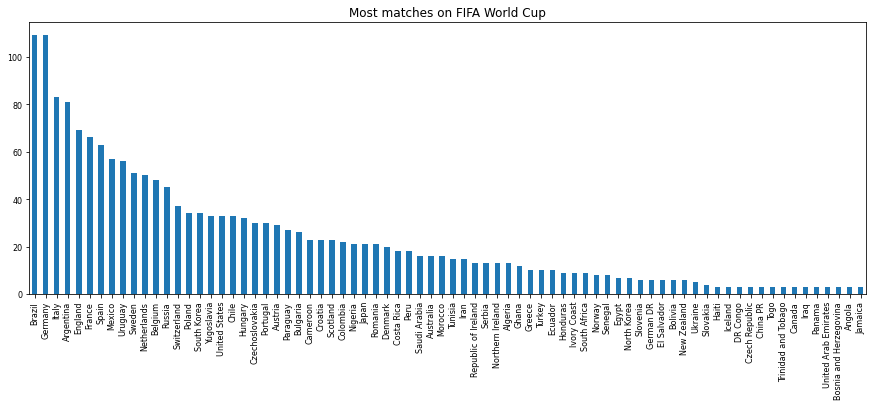

In [10]:
home=df[df.tournament=="FIFA World Cup"].groupby("home_team")["home_team"].count().reset_index(name="home_matches")
away=df[df.tournament=="FIFA World Cup"].groupby("away_team")["away_team"].count().reset_index(name="away_matches")
merged=home.merge(away,left_on="home_team",right_on="away_team")[["home_team","home_matches","away_matches"]]
merged["matches"]=merged["home_matches"]+merged["away_matches"]
result=merged.rename(columns={"home_team":"team"})[["team","matches"]].sort_values("matches",ascending=False)

result.plot(kind="bar",figsize=(15,5),xlabel="",x="team",y="matches",fontsize=8,legend=False)
plt.title("Most matches on FIFA World Cup")
plt.show()

# Which countires and how many times have hosted international matches during WW2

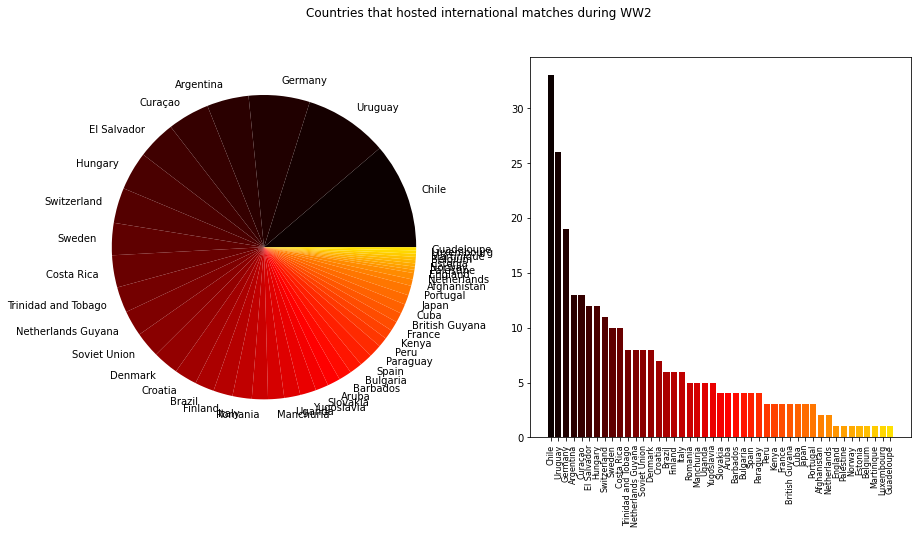

In [36]:
filtered=df[(df.date>="1939-09-01")&(df.date<"1945-09-02")]
grouped=filtered.groupby("country")["country"].count().reset_index(name="count").sort_values("count",ascending=False)

cmap=plt.get_cmap("hot")
colors=list(cmap(np.linspace(0,0.7,grouped.country.nunique())))

fig,axes=plt.subplots(1,2,figsize=(15,7))

plt.subplot(1,2,1)
plt.pie(grouped["count"],colors=colors,labels=grouped.country)

plt.subplot(1,2,2)
plt.bar(grouped["country"],grouped["count"],color=colors)
plt.xticks(rotation=90,size=8)

plt.suptitle("Countries that hosted international matches during WW2")

plt.show()

# Which team has  the highest win percentage in international matches having they have played more than 100 matches

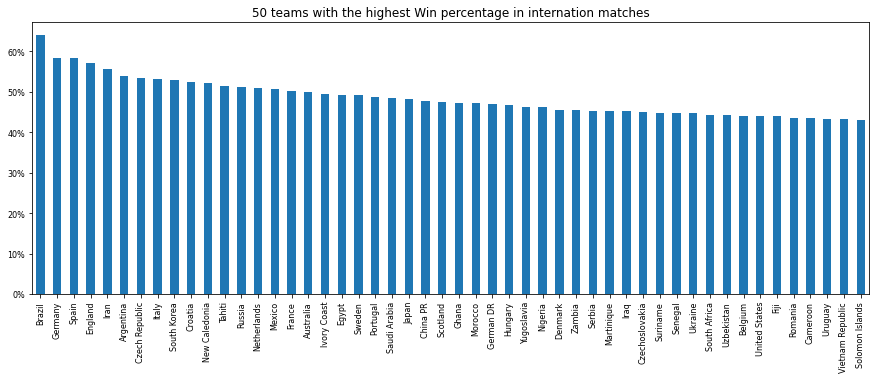

In [70]:
home_matches=df.groupby("home_team")["home_team"].count().reset_index(name="home_matches")
home_wins=df[df.home_score>df.away_score].groupby("home_team")["home_team"].count().reset_index(name="home_wins")

away_matches=df.groupby("away_team")["away_team"].count().reset_index(name="away_matches")
away_wins=df[df.home_score<df.away_score].groupby("away_team")["away_team"].count().reset_index(name="away_wins")

merged1=home_matches.merge(home_wins,on="home_team",how="left")
merged2=away_matches.merge(away_wins,on="away_team",how="left")
merged=merged1.merge(merged2,left_on="home_team",right_on="away_team")

merged[["home_matches","away_matches","home_wins","away_wins"]]=merged[["home_matches","away_matches","home_wins","away_wins"]].fillna(0)

merged["matches"]=merged.home_matches+merged.away_matches
merged["wins"]=merged.home_wins+merged.away_wins
merged["win_percentage"]=(merged.wins/merged.matches*100).round(2)
merged.rename(columns={"home_team":"team"},inplace=True)
result=merged[["team","matches","wins","win_percentage"]]
result=result.sort_values("win_percentage",ascending=False)
result=result[result.matches>100]

import matplotlib.ticker as mtick
result.head(50).plot(kind="bar",x="team",y="win_percentage",figsize=(15,5),fontsize=8,legend=False,xlabel="")
plt.title("50 teams with the highest Win percentage in internation matches")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.show()

# Which team has the highest win percentage in penalties, on condition that they have played more than 5

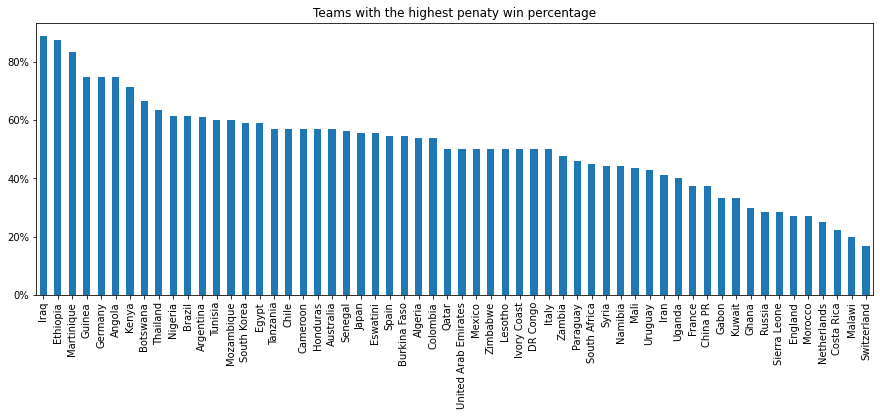

In [77]:
filtered=df[df.penalty_winner.isna()==False]

penalties_played1=filtered.groupby("home_team")["home_team"].count().reset_index(name="penalties_played1")
penalties_played2=filtered.groupby("away_team")["away_team"].count().reset_index(name="penalties_played2")

merged=penalties_played1.merge(penalties_played2,left_on="home_team",right_on="away_team",how="outer")

merged[["penalties_played1","penalties_played2"]]=merged[["penalties_played1","penalties_played2"]].fillna(0)
merged["penalties_played"]=merged.penalties_played1+merged.penalties_played2
merged["team"]=[h if h is None else a for h,a in zip(merged.home_team,merged.away_team)]
merged=merged[["team","penalties_played"]]

wins=filtered.groupby("penalty_winner")["penalty_winner"].count().reset_index(name="penalties_won")
result=merged.merge(wins,left_on="team",right_on="penalty_winner",how="left")

result["win_percentage"]=(result.penalties_won/merged.penalties_played*100).round(2)
result=result[result.penalties_played>5]
result=result.sort_values("win_percentage",ascending=False)
result.dropna(subset=["team"],inplace=True)

import matplotlib.ticker as mtcik
result.plot(kind="bar",figsize=(15,5),x="team",y="win_percentage",xlabel="",legend=False)
plt.title("Teams with the highest penaty win percentage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.show()

# Longest consecutive home win chain for every team

In [131]:
# is the row a win?
win = ndf['home_score'].gt(ndf['away_score'])

# subselect wins, groupby consecutive wins, get size, get max size
(win[win]
 .groupby([ndf['home_team'], (~win).cumsum()])
 .size()
 .groupby(level='home_team').max()
)

home_team
Abkhazia           4
Afghanistan        6
Albania            5
Algeria            9
American Samoa     1
                  ..
Yugoslavia        11
Zambia            10
Zanzibar           2
Zimbabwe           6
Åland Islands      4
Length: 289, dtype: int64

# or 

In [127]:
data={}
ndf=df.sort_values(['home_team',"date"])

for team in sorted(df.home_team.unique()):
    ndf[ndf.home_team==team]
    i=ndf[ndf.home_team==team]["home_score"]>ndf[ndf.home_team==team]["away_score"]
    j = i.ne(i.shift()).cumsum()
    freeze = j[i].value_counts().max()
    data[str(team)]=freeze
data

{'Abkhazia': 4,
 'Afghanistan': 6,
 'Albania': 5,
 'Alderney': nan,
 'Algeria': 9,
 'American Samoa': 1,
 'Andalusia': 3,
 'Andorra': 2,
 'Angola': 6,
 'Anguilla': 1,
 'Antigua and Barbuda': 4,
 'Arameans Suryoye': 1,
 'Argentina': 16,
 'Armenia': 3,
 'Artsakh': 2,
 'Aruba': 3,
 'Australia': 11,
 'Austria': 7,
 'Azerbaijan': 4,
 'Bahamas': 3,
 'Bahrain': 7,
 'Bangladesh': 5,
 'Barawa': 1,
 'Barbados': 5,
 'Basque Country': 6,
 'Belarus': 4,
 'Belgium': 8,
 'Belize': 5,
 'Benin': 6,
 'Bermuda': 7,
 'Bhutan': 2,
 'Bolivia': 7,
 'Bonaire': 1,
 'Bosnia and Herzegovina': 4,
 'Botswana': 6,
 'Brazil': 21,
 'British Virgin Islands': 2,
 'Brittany': 2,
 'Brunei': 2,
 'Bulgaria': 14,
 'Burkina Faso': 10,
 'Burundi': 3,
 'Cambodia': 4,
 'Cameroon': 13,
 'Canada': 8,
 'Canary Islands': 2,
 'Cape Verde': 7,
 'Cascadia': 2,
 'Catalonia': 4,
 'Cayman Islands': 3,
 'Central African Republic': 3,
 'Central Spain': 1,
 'Chad': 2,
 'Chagos Islands': nan,
 'Chameria': 1,
 'Chile': 9,
 'China PR': 14,
 'C

# which team score most goals per match and which team accepts the least. Which teams have the best ratio of scored vs accepted 

In [79]:
home=df.groupby("home_team").agg({"home_score":"mean","away_score":"mean"}).reset_index()
home.rename(columns={"home_team":"team","home_score":"home_scored","away_score":"home_accepted"},inplace=True)
away=df.groupby("away_team").agg({"away_score":"mean","home_score":"mean"}).reset_index()
away.rename(columns={"away_team":"team","away_score":"away_scored","home_score":"away_accepted"},inplace=True)

merged=home.merge(away,on="team")

merged["avg_scored"]=(merged.home_scored+merged.away_scored)/2
merged["avg_accepted"]=(merged.home_accepted+merged.away_accepted)/2
merged["ratio"]=(merged.avg_scored/merged.avg_accepted).round(2)
merged=merged[["team","avg_scored","avg_accepted","ratio"]]

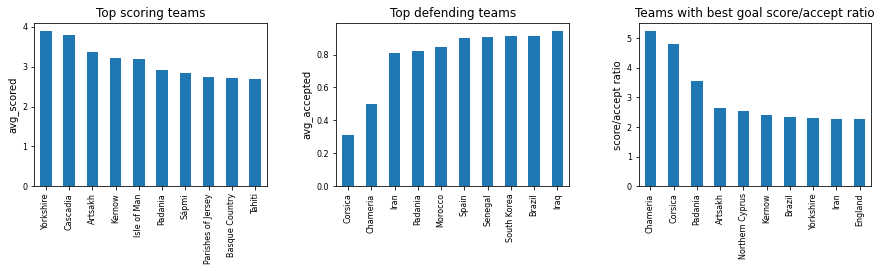

In [80]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3))

sorted=merged.sort_values("avg_scored",ascending=False).head(10)
sorted.plot(kind="bar",ax=ax1,x="team",y="avg_scored",title="Top scoring teams",legend=False,xlabel="",ylabel="avg_scored",fontsize=8)

sorted=merged.sort_values("avg_accepted",ascending=True).head(10)
sorted.plot(kind="bar",ax=ax2,x="team",y="avg_accepted",title="Top defending teams",legend=False,xlabel="",ylabel="avg_accepted",fontsize=8)

sorted=merged.sort_values("ratio",ascending=False).head(10)
sorted.plot(kind="bar",ax=ax3,x="team",y="ratio",title="Teams with best goal score/accept ratio",legend=False,xlabel="",ylabel="score/accept ratio",fontsize=8)

plt.subplots_adjust(wspace=0.3)
plt.show()

# 5 Matches with the highest goal balance for one team

In [101]:
df["goal_balance"]=(df.home_score-df.away_score).abs()
df.sort_values("goal_balance",ascending=False)[:5]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner,year,goal_balance
23965,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,NaN,2001,31
8009,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False,NaN,1971,30
11110,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False,NaN,1979,24
23962,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,NaN,2001,22
27542,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True,NaN,2005,21


# Which teams have played the most matches against each other

In [53]:
grouped=df[['home_team', 'away_team']].apply(frozenset, axis=1).value_counts().reset_index()
grouped.columns=["pair_of_teams","number_of_matches_between"]
grouped

,pair_of_teams,number_of_matches_between
0,"(Argentina, Uruguay)",179
1,"(Hungary, Austria)",137
2,"(Netherlands, Belgium)",125
3,"(England, Scotland)",117
4,"(Kenya, Uganda)",109
...,...,...
6940,"(Latvia, Bahrain)",1
6941,"(Tajikistan, Kuwait)",1
6942,"(Thailand, Germany)",1
6943,"(Basque Country, Honduras)",1


# Plot distribution of goals per match

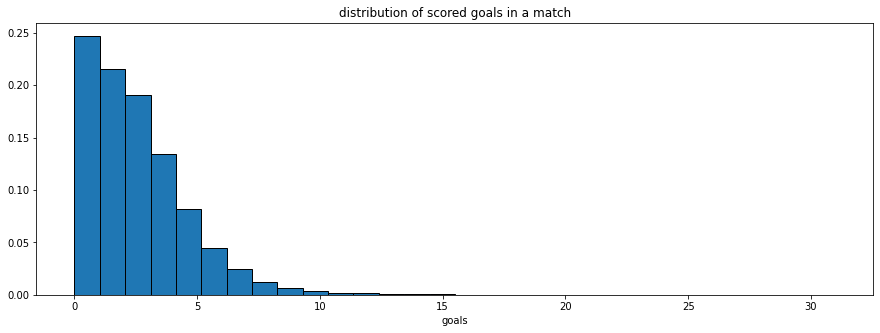

In [21]:
df["goals"]=df.home_score+df.away_score

plt.figure(figsize=(15,5))
plt.hist(df.goals,ec="k",bins=30,density=True)
plt.title("distribution of scored goals in a match")
plt.xlabel("goals")
plt.show()

# Win percentage of Georgian National Football Team per year vs Ukraine, Armenia, Azerbaijan

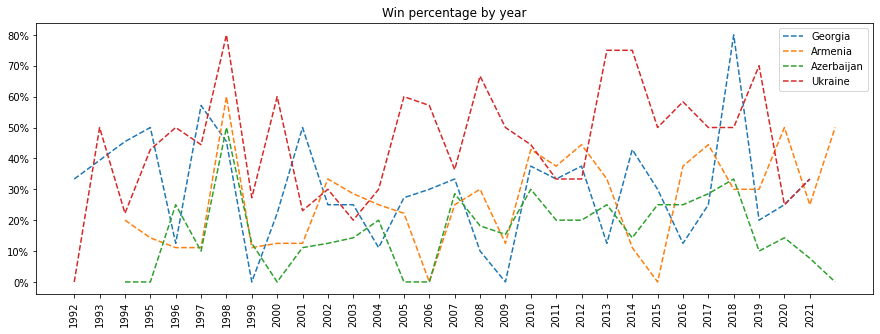

In [12]:
import matplotlib.ticker as mtick
plt.figure(figsize=(15,5))

teams=["Georgia","Armenia","Azerbaijan","Ukraine"]
compiled=pd.DataFrame()

for team in teams:

    home_matches=df[df.home_team==team].groupby(["year","home_team"])["home_team"].count().reset_index(name="home_matches")
    home_wins=df[(df.home_score>df.away_score)&(df.home_team==team)].groupby(["year","home_team"])["home_team"].count().reset_index(name="home_wins")

    away_matches=df[df.away_team==team].groupby(["year","away_team"])["away_team"].count().reset_index(name="away_matches")
    away_wins=df[(df.home_score<df.away_score)&(df.away_team==team)].groupby(["year","away_team"])["away_team"].count().reset_index(name="away_wins")

    merged1=home_matches.merge(home_wins,on=["year","home_team"],how="left")
    merged2=away_matches.merge(away_wins,on=["year","away_team"],how="left")
    merged=merged1.merge(merged2,left_on=["year","home_team"],right_on=["year","away_team"])

    merged[["home_matches","away_matches","home_wins","away_wins"]]=merged[["home_matches","away_matches","home_wins","away_wins"]].fillna(0)

    merged["matches"]=merged.home_matches+merged.away_matches
    merged["wins"]=merged.home_wins+merged.away_wins
    merged["win_percentage"]=(merged.wins/merged.matches*100).round(2)
    merged.rename(columns={"home_team":"team"},inplace=True)
    result=merged[["year","team","matches","wins","win_percentage"]]
    plt.plot(result.year,result.win_percentage,ls="--",label=team)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
    plt.xticks(result.year,rotation=90)
plt.title("Win percentage by year")
plt.legend()
plt.show()

# which are the most awkward rivals  (like Germany and  Portugal)

### count number of losses of team_one vs team_two

In [34]:
grouped1=df[df.home_score<df.away_score].groupby(["home_team","away_team"])["home_team"].count().reset_index(name="home_losses")
grouped2=df[df.home_score>df.away_score].groupby(["away_team","home_team"])["away_team"].count().reset_index(name="away_losses")

merged=grouped1.merge(grouped2,left_on=["home_team","away_team"],right_on=["away_team","home_team"])

result=merged[["home_team_x","away_team_x","home_losses","away_losses"]]
result=result.rename(columns={"home_team_x":"losser_team","away_team_x":"winner_team"})

result["losses"]=result.home_losses+result.away_losses
result_loss=result.sort_values(["losser_team","losses"],ascending=[True,False])
#result_loss

### count number of matches of team_one vs team_two 

In [38]:
grouped1=df.groupby(["home_team","away_team"])["home_team"].count().reset_index(name="home_matches")
grouped2=df.groupby(["away_team","home_team"])["away_team"].count().reset_index(name="away_matches")

merged=grouped1.merge(grouped2,left_on=["home_team","away_team"],right_on=["away_team","home_team"])

result=merged[["home_team_x","away_team_x","home_matches","away_matches"]]
result=result.rename(columns={"home_team_x":"team_one","away_team_x":"team_two"})

result["matches"]=result.home_matches+result.away_matches
result_matches=result.sort_values(["team_one","matches"],ascending=[True,False])
#result_matches

### Finally merge two tables and find the percentage of losses vs team_two 

In [41]:
final=result_matches.merge(result_loss,left_on=["team_one","team_two"],right_on=["losser_team","winner_team"])
final=final[["losser_team","winner_team","matches","losses"]]
final["loss_percentage"]=(final.losses/final.matches*100).round()
final=final.sort_values(["losser_team","loss_percentage"],ascending=[True,False])
final
#final[final.losser_team=="Georgia"]

,losser_team,winner_team,matches,losses,loss_percentage
6,Afghanistan,Syria,4,4,100.0
7,Afghanistan,Oman,3,3,100.0
9,Afghanistan,Japan,2,2,100.0
3,Afghanistan,Tajikistan,6,5,83.0
4,Afghanistan,Qatar,5,4,80.0
...,...,...,...,...,...
4152,Zimbabwe,Malawi,62,17,27.0
4158,Zimbabwe,Mauritius,13,3,23.0
4155,Zimbabwe,Botswana,18,4,22.0
4168,Åland Islands,Jersey,6,6,100.0
